# Note :
## In this notebook we will seee the gradient desceent impleeementation of the logistic regeression . We will reduce the the loss function **L = Y log Y_hat - (1-Y) log (1-Y_hat)** by the derivation the apply with the gradient descent .

## After derivation we got *Dl/DW =  -1/m [Y - Y_hat] X*
# **Implementation**
## STEP 1: initaalize the w matrix with random value
## STEP 2: Update the matrix step by step *W_new = W_old - LR * DL/DW*

In [1]:
import numpy as np
import pandas as pd

In [20]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

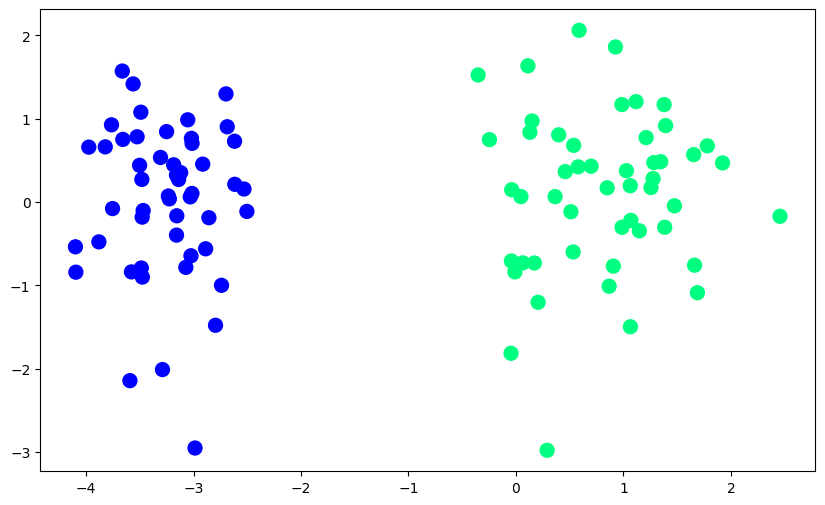

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [7]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty= 'none',solver= 'sag')

log.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [8]:
log.coef_ , log.intercept_

(array([[4.92263075, 0.24342818]]), array([5.87345056]))

In [11]:
m1 = -(log.coef_[0][0]/log.coef_[0][1])
b1 = -(log.intercept_/log.coef_[0][1])

In [14]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

(-3.0, 2.0)

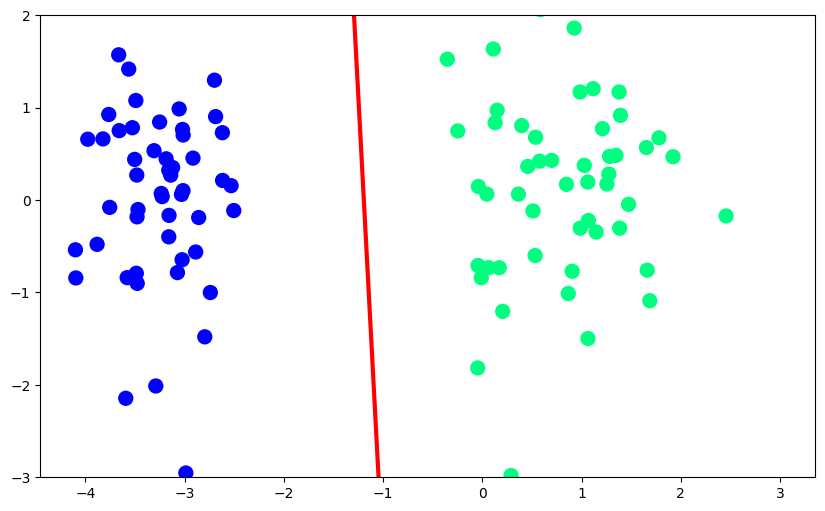

In [35]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Now create our own Classification class

In [21]:
def sigmoid(z):
  return 1/(1+ np.exp(-z))

In [29]:
def Gdlog(X,y):
  X = np.insert(X,0,1,axis= 1)
  weights = np.ones(X.shape[1])
  lr = 0.1
  for i in range(0,4000):
    y_hat = sigmoid(np.dot(X,weights))

    weights = weights + lr * (np.dot((y-y_hat),X)/X.shape[0])

  return weights[0] , weights[1:]


In [30]:
intercept_ , coef_ = Gdlog(X,y)

In [31]:
intercept_ , coef_

(4.058108578972468, array([3.62716667, 0.12169481]))

In [32]:
# find out the intercept and the coefficirnnt m and b
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [33]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

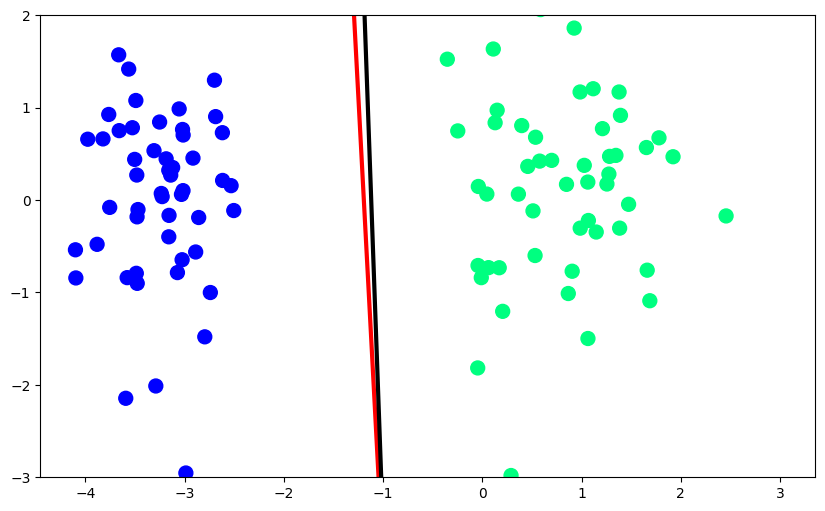

In [34]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)